In [41]:
# with Missing data
data2 <- read.csv("C:/Users/radha31/Downloads/Marks2.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

str(data2)

'data.frame':	100 obs. of  3 variables:
 $ exam_1  : num  34.6 30.3 35.8 60.2 79 ...
 $ exam_2  : num  78 43.9 72.9 86.3 75.3 ...
 $ admitted: int  0 0 0 1 1 0 1 1 1 1 ...


In [30]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(data2), 0.8*nrow(data2))  # row indices for training data
trainingData <- data[trainingRowIndex, ]  # model training data
testData  <- data[-trainingRowIndex, ]   # test data

dim(testData )
logitMod <- glm(admitted ~ exam_1+exam_2, 
                data=trainingData, 
                family=binomial(link="logit"))

#predicted <- plogis(predict(logitMod, testData))  # predicted scores
# or
predicted <- predict(logitMod, testData, type="response")  # predicted scores
predicted

[1] 20  3

1          3          4          5          7         14         23 
0.17958725 0.11216503 0.97064749 0.99147007 0.99392453 0.99851124 0.03528774 
        29         33         41         44         59         60         68 
0.19555235 0.26312415 0.49020396 0.57093568 0.96261235 0.98394659 0.04334555 
        69         76         82         88         96        100 
0.99935329 0.99941754 0.94690891 0.99830929 0.82700994 0.99786603

In [31]:
## CIs using profiled log-likelihood
confint(logitMod)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-27.96769761,-10.7926517
exam_1,0.08780418,0.2372689
exam_2,0.08210701,0.2279395


In [32]:
## odds ratios only
exp(coef(logitMod))

(Intercept)       exam_1       exam_2 
1.721457e-08 1.161756e+00 1.153872e+00

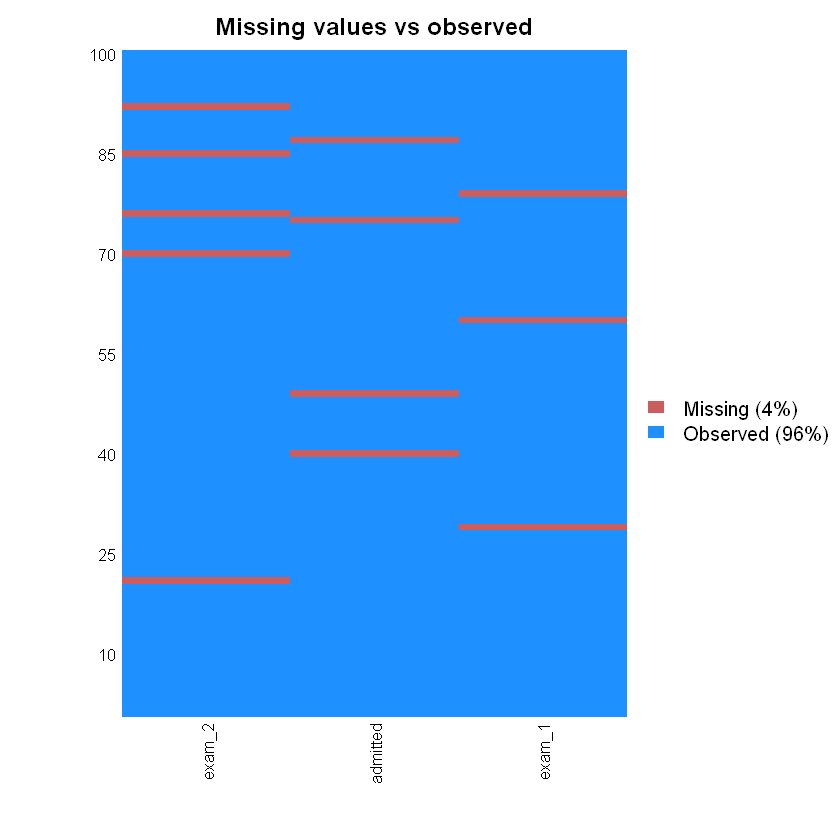

In [42]:
#A visual take on the missing values might be helpful: the Amelia package has a special plotting function missmap() that will plot your dataset and highlight missing values:

library(Amelia)
missmap(data2, main = "Missing values vs observed")

In [34]:
# install.packages("Amelia")

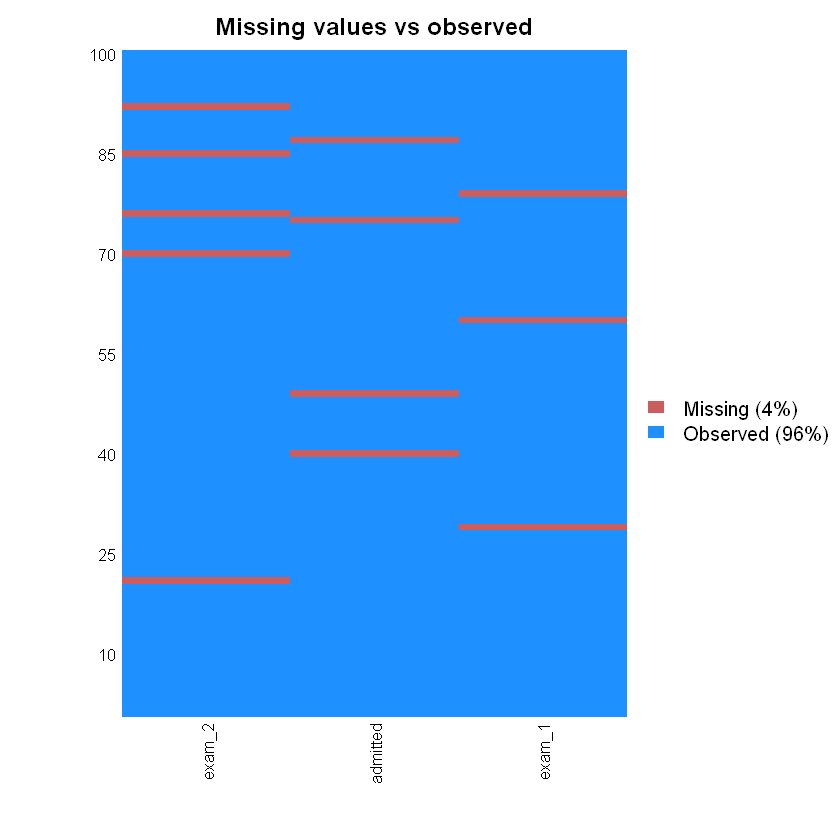

In [44]:
missmap(data2, main = "Missing values vs observed")

In [52]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [53]:
getmode(data2$admitted)

[1] 1

In [38]:
data2$admitted <- as.factor(data2$admitted)
contrasts(data2$admitted)

,1
0,0
1,1


In [45]:
# count of 1,0

table(data2$admitted)
tabulate(data2$admitted)


 0  1 
40 56 

[1] 56

Warning message in data(data2, package = "VIM"):
"data set 'data2' not found"

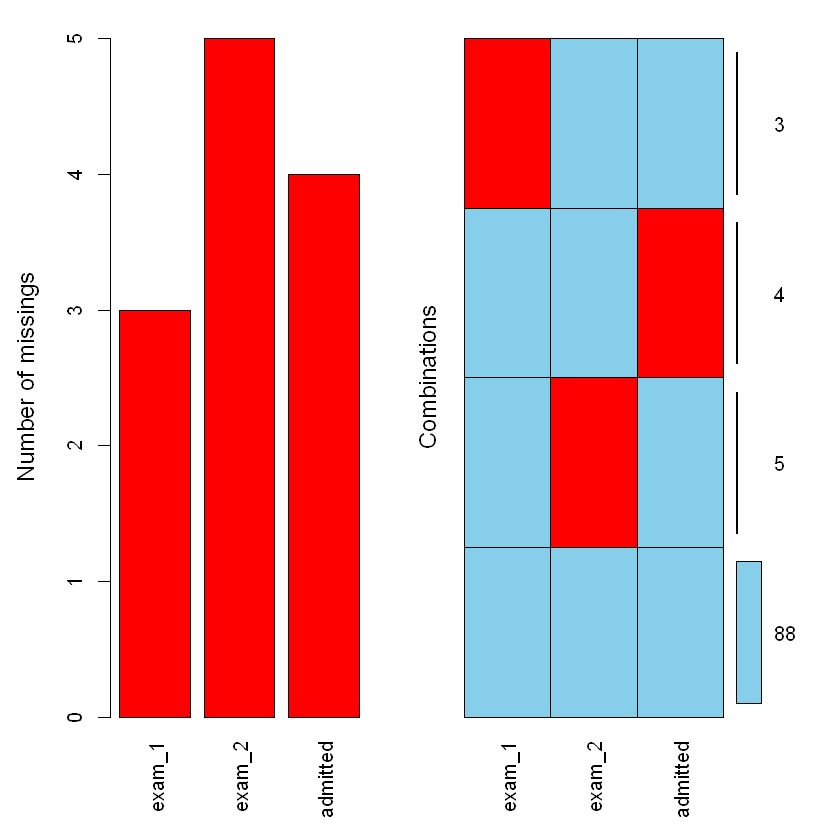

In [46]:
## Load VIM package for Visualization and Imputation of Missing Values

library(VIM)
## Load sleep data in VIM
data(data2, package = "VIM")
## in number
aggr(data2, prop = F, numbers = T)

In [25]:
#install.packages("VIM")

Installing package into 'C:/Users/radha31/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'zoo', 'DEoptimR', 'lmtest', 'robustbase', 'vcd', 'e1071', 'laeken'



package 'zoo' successfully unpacked and MD5 sums checked
package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked
package 'vcd' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'laeken' successfully unpacked and MD5 sums checked
package 'VIM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\radha31\AppData\Local\Temp\RtmpmSR3Pm\downloaded_packages


In [49]:
data2$exam_1[is.na(data2$exam_1)] <- mean(data2$exam_1,na.rm=T) # Missingvalue replace

In [50]:
data2$exam_2[is.na(data2$exam_2)] <- mean(data2$exam_2,na.rm=T) # Missingvalue replace

In [55]:
# based on Mode
data2$admitted[is.na(data2$admitted)] <- 1 # Missingvalue replace

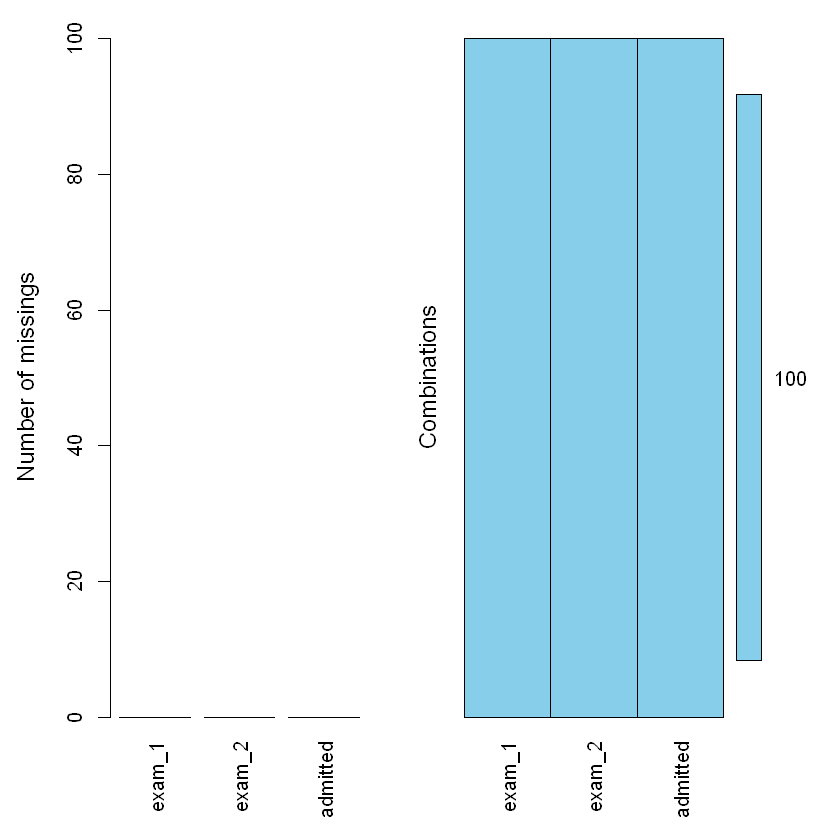

In [56]:
aggr(data2, prop = F, numbers = T)